# Summary of Results

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from pathlib import Path
import collections

In [4]:
import yaml

In [60]:
def summary_plot(diagonal=False, **jobs):
    """
    """
    base = Path('results')
    metrics = 'FOM_DETF_3x2', 'FOM_3x2', 'SNR_3x2'
    markers = 'o', 's', '^'
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    for j, label in enumerate(jobs):
        color = f'C{j}'
        for ax in axes:
            ax.plot([], [], '-', c=color, label=label)
        for job in jobs[label]:
            with open(base / job / 'config.yaml') as f:
                config = yaml.safe_load(f)
            metric = config['metric']
            marker = markers[metrics.index(metric)]
            nbin = []
            scores = {m: [] for m in metrics}
            for n in config['nbin']:
                scorespath = base / job / f'nbin-{n}' / f'scores-{n}.yaml'
                if scorespath.exists():
                    with open(scorespath) as f:
                        best_scores = yaml.safe_load(f)
                    nbin.append(n)
                    for m, v in best_scores.items():
                        scores[m].append(v)
            for i,m in enumerate(metrics):
                if diagonal and m != metric:
                    continue
                ax = axes[i]
                ax.plot(nbin, scores[m], ls='-', c=color)
                ax.scatter(nbin, scores[m], lw=1, marker=marker, zorder=10,
                           edgecolors='k', facecolors='k' if m==metric else 'lightgray')
    for i,m in enumerate(metrics):
        ax = axes[i]
        ax.set_xlabel('Number of tomographic bins')
        ax.set_ylabel(m)
        ax.set_ylim(0, None)
        ax.grid(axis='y', ls=':', color='k', alpha=0.5)
        ax.legend()
        if not diagonal:
            handles, labels = [], []
            for j, mopt in enumerate(metrics):
                handles.append(ax.scatter([], [], c='k', lw=0, marker=markers[j]))
                labels.append('Optimize ' + mopt)
            fig.legend(handles, labels, ncol=3, loc='center', bbox_to_anchor=(0.5, 1))
    plt.tight_layout()

Using 0-3 zedges:

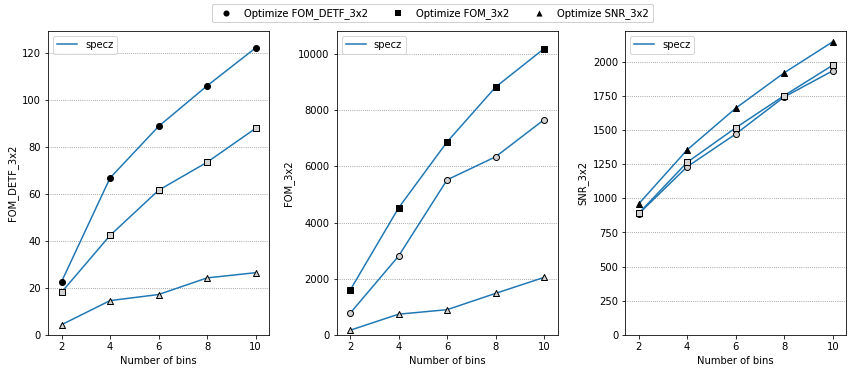

In [56]:
summary_plot(specz=['direct-detf', 'direct-fom', 'direct-snr'])

Using zedges for buzzard zmax:

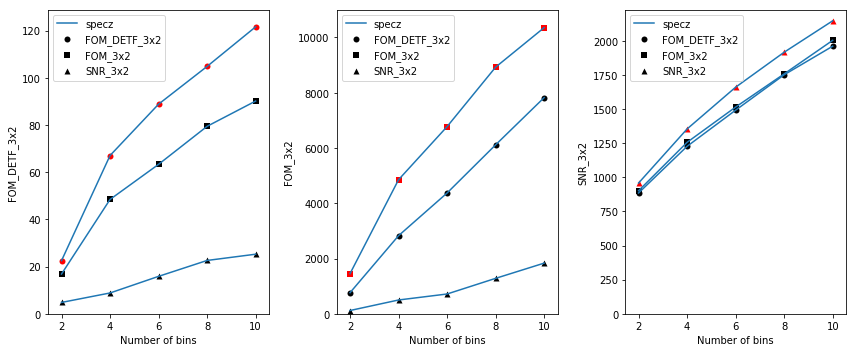

In [41]:
summary_plot(specz=['direct-detf', 'direct-fom', 'direct-snr'])

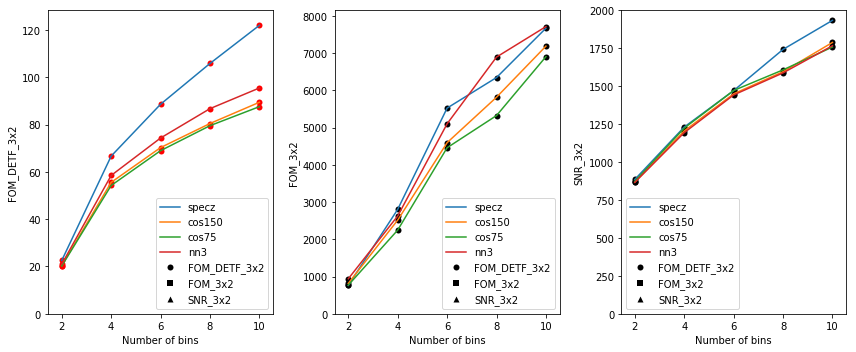

In [6]:
summary_plot(specz=['direct-detf'],
             #emd300=['edm-300-detf'],
             #emd150=['edm-150-detf'],
             cos150=['cos-150-detf'],
             #wgt150=['wgt-150-detf'],
             cos75=['cos-75-detf'],
             nn3=['nn-3-64-detf'],
             #nn2=['nn-3-detf'],
             #nn4=['nn-2-64-detf'],
             #nn2=['nn-2-64-detf']
            )

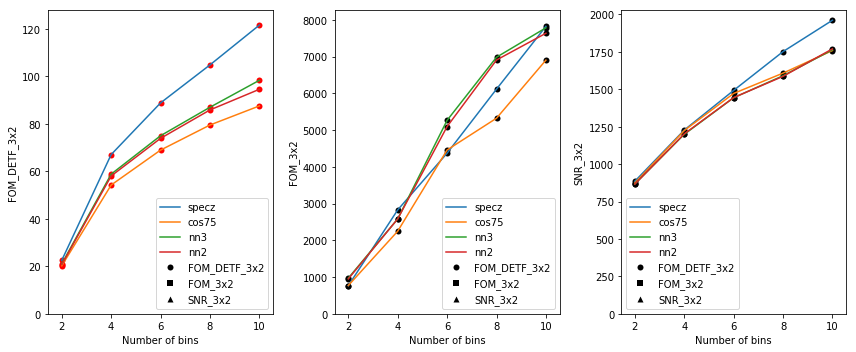

In [55]:
summary_plot(specz=['direct-detf'],
             #emd300=['edm-300-detf'],
             #emd150=['edm-150-detf'], cos150=['cos-150-detf'], wgt150=['wgt-150-detf'],
             cos75=['cos-75-detf'],
             nn3=['nn-3-64-detf'],
             #nn2=['nn-3-detf'],
             #nn4=['nn-2-64-detf'],
             nn2=['nn-2-64-detf'])

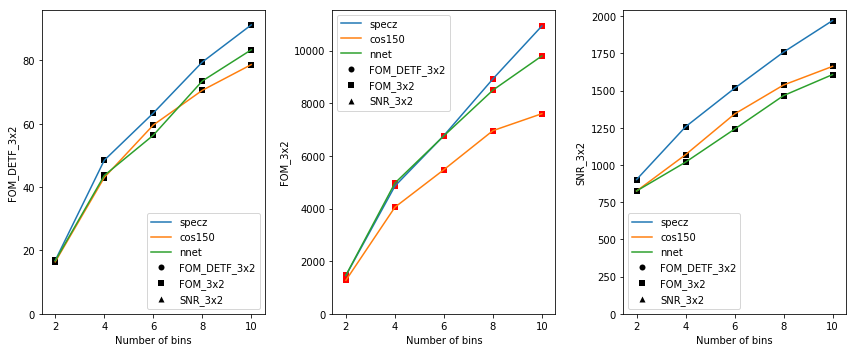

In [56]:
summary_plot(specz=['direct-fom'], cos150=['cos-150-fom'], nnet=['nn-3-64-fom'])

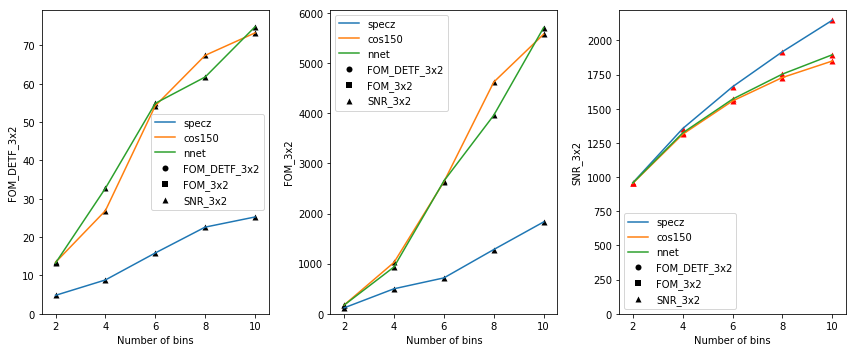

In [57]:
summary_plot(specz=['direct-snr'], cos150=['cos-150-snr'], nnet=['nn-3-64-snr'])

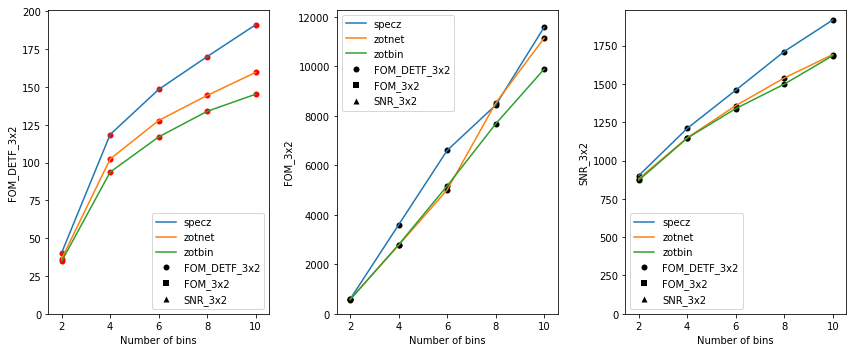

In [20]:
summary_plot(specz=['direct-detf-dc2'],
             zotnet=['nn-3-64-detf-dc2'],
             zotbin=['cos-150-detf-dc2']
            )

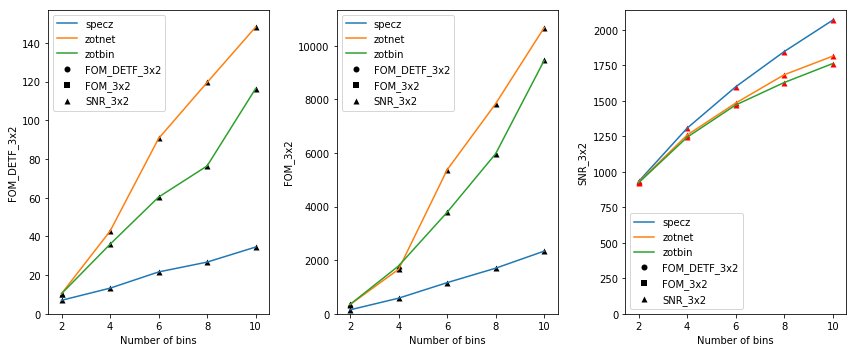

In [21]:
summary_plot(specz=['direct-snr-dc2'],
             zotnet=['nn-3-64-snr-dc2'],
             zotbin=['cos-150-snr-dc2']
            )

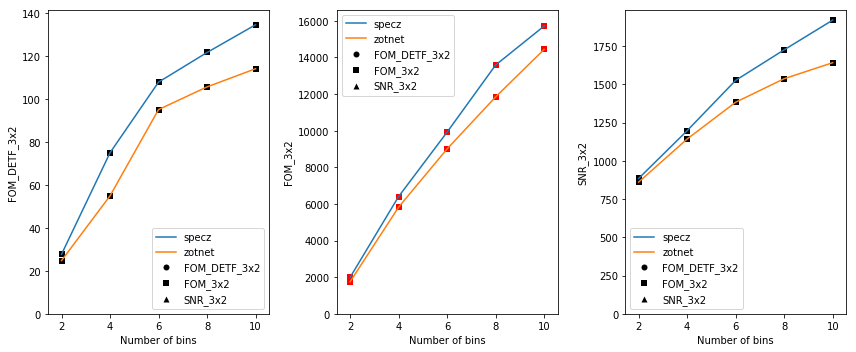

In [18]:
summary_plot(specz=['direct-fom-dc2'],
             zotnet=['nn-3-64-fom-dc2'],
             zotbin=['cos-150-fom-dc2']
            )

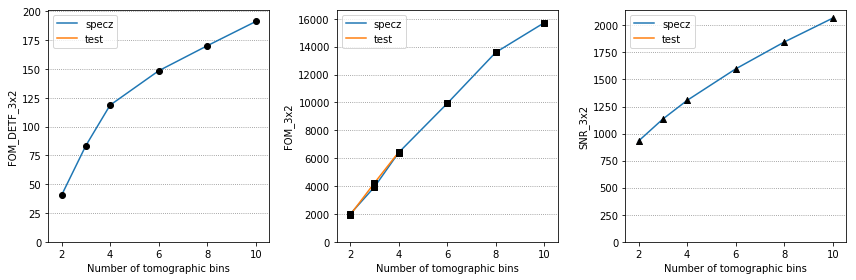

In [73]:
summary_plot(specz=['direct-detf-dc2', 'direct-fom-dc2', 'direct-snr-dc2'],
             test=['direct-fom-dc2-softmax'],
             #zotnet=['nn-3-64-detf-dc2', 'nn-3-64-fom-dc2', 'nn-3-64-snr-dc2'],
             #zotbin=['cos-150-detf-dc2', 'cos-150-fom-dc2', 'cos-150-snr-dc2'],
             diagonal=True)
#plt.savefig('dc2.png')

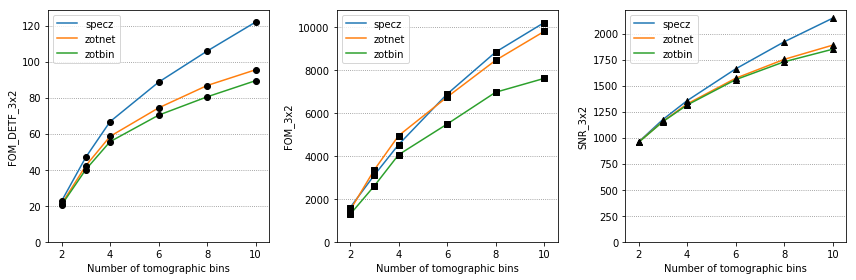

In [70]:
summary_plot(specz=['direct-detf', 'direct-fom', 'direct-snr'],
             zotnet=['nn-3-64-detf', 'nn-3-64-fom', 'nn-3-64-snr'],
             zotbin=['cos-150-detf', 'cos-150-fom', 'cos-150-snr'],
             diagonal=True)
#plt.savefig('buzzard.png')